In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import pandas as pd

Hi John,

https://www.dropbox.com/s/v4vwfwdsmro7h5o/cropfigs.zip?dl=0​

Here's a zipped file with a bunch of images with the naming convention

    wg04<dimension>_<z coordinate>_<noise parameter>.tif

where the dimension= big for low resolution and =sm for high resolution. The noise parameter is either ptN or blurN where N is the noise "iteration", increasing with increasing noise level.

Here is a list of all the z coordinates in case its helpful:

zbigs = [0, 9,18,28,37,46,55,64,74,83,92,101,111,120,129,138,147,157,166,175,184,193,203,212,221,230,240,249,258,267,276,286,295,304,313,322,332,341,350,359,368,378,387,396,405,415,424,433,442,451,461,470,479,488,497,507,516,525,534,544,553,562,571,580,590,599,608,617,626,636,645,654,663,672,682,691,700,709,719,728,737,746,755,765,774,783,792,801,811,820,829,838,848,857,866,875,884,894,903,912,921,930,940,949,958,967,976,986,995,1004,1013,1023,1032,1041,1050,1059,1069,1078,1087,1096,1105,1115,1124,1133,1142,1151,1161,1170,1179,1188,1198,1207,1216,1225,1234,1244,1253,1262,1271,1280,1290,1299,1308,1317,1327,1336,1345,1354,1363,1373,1382,1391,1400,1409,1419,1428,1437,1446,1455,1465,1474,1483,1492,1502,1511,1520,1529,1538,1548,1557,1566,1575,1584,1594,1603,1612,1621,1631,1640,1649,1658,1667,1677,1686,1695,1704,1713,1723,1732,1741,1750,1759,1769,1778,1787,1796,1806,1815,1824,1833,1842,1852,1861,1870,1879,1888,1898,1907,1916,1925,1935,1944,1953,1962,1971,1981,1990,1999]
         
You can ignore the images with hd1 and hd2 in the name (these are vertical slices that I stopped analysing a while ago).

I'm also attaching some python scripts that I'm using to segment these images, in case they're helpful to you.

Best,
Jess

In [2]:
# ls --ignore='*blur*' cropfigs

In [3]:
blur0 = !ls cropfigs/*wg04big*_blur0.tif

In [4]:
stack = np.zeros((166,166))
for b in blur0:
    img = mpimg.imread(b)
    stack += img

Text(5, 160, 'stacking all of the data')

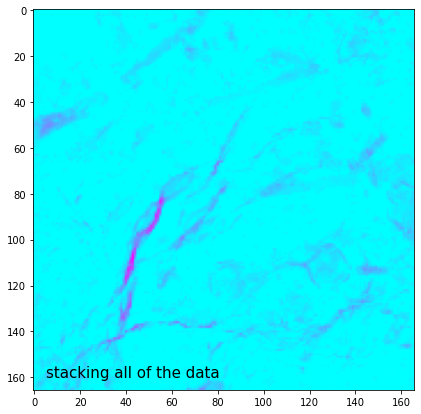

In [5]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.imshow(stack, cmap='cool')
ax.text(x=5, y=160, s='stacking all of the data', fontsize=15)

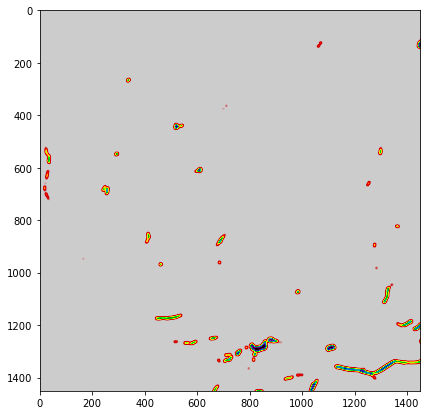

In [6]:
img = mpimg.imread('cropfigs/wg04sm_0009_blur2.tif')
fig, ax = plt.subplots(figsize=(9, 7))
ax.imshow(img, cmap='nipy_spectral_r')

In [7]:
img.shape

(1451, 1451)

In [8]:
from skimage.morphology import skeletonize
from skimage.util import invert


In [9]:
image = invert(img)
image = image/image.max()
skeleton = skeletonize(image, method='lee')

In [10]:
skeleton.max()

255

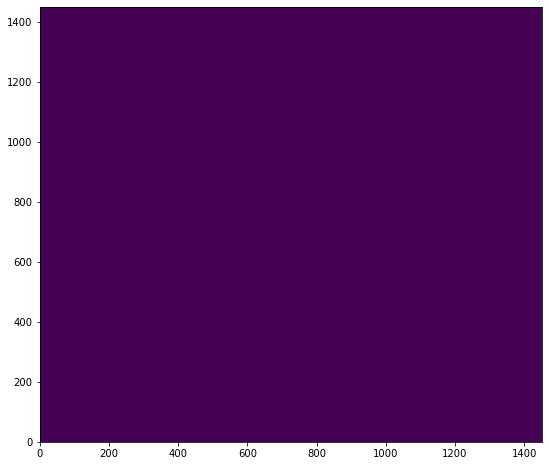

In [11]:
fig, ax = plt.subplots(figsize=(9,8))

ax.pcolormesh(skeleton)

In [12]:
from skimage.filters import meijering, sato, frangi, hessian
# https://scikit-image.org/docs/dev/auto_examples/edges/plot_ridge_filter.html

/home/john/anaconda3/envs/glaciers/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Previously, hessian implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  """Entry point for launching an IPython kernel.


/home/john/anaconda3/envs/glaciers/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Previously, hessian implicitly used 'constant' as the border mode when dealing with the edge of the array. The new behavior is 'reflect'. To recover the old behavior, use mode='constant'. To avoid this warning, please explicitly set the mode.
  """


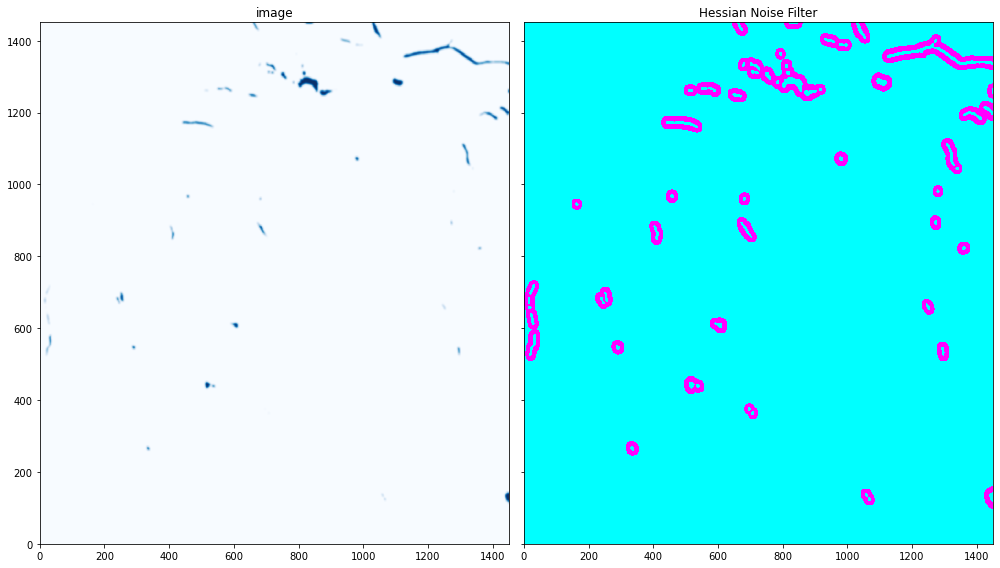

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(14,8), sharex=True, sharey=True)

img = mpimg.imread('cropfigs/wg04sm_0009_blur2.tif')

result = hessian(img, sigmas=[2,2])

ax[0].pcolormesh(img, cmap='Blues')
ax[1].pcolormesh(result, cmap='cool_r')

ax[0].set_title('image')
ax[1].set_title('Hessian Noise Filter')

fig.tight_layout()

In [63]:
from skimage.measure import label, regionprops, regionprops_table

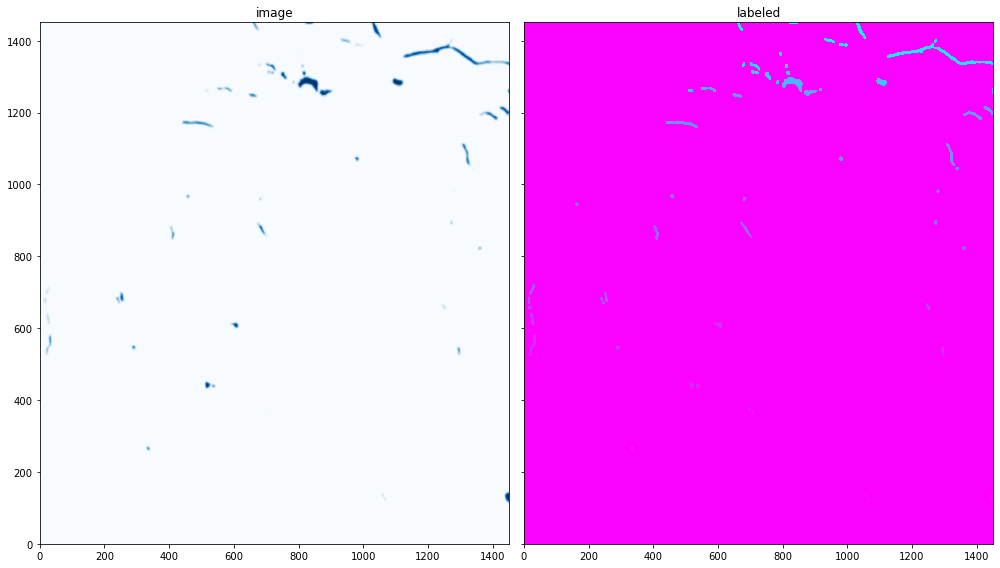

In [48]:
lab = label(result)

fig, ax = plt.subplots(1, 2, figsize=(14,8), sharex=True, sharey=True)

# img = mpimg.imread('cropfigs/wg04sm_0009_blur2.tif')

# result = hessian(img, sigmas=[2,2])

ax[0].pcolormesh(img, cmap='Blues')
ax[1].pcolormesh(lab, cmap='cool_r')

ax[0].set_title('image')
ax[1].set_title('labeled')

fig.tight_layout()

In [60]:
regionprops(lab)[1]

In [71]:
fracprops = pd.DataFrame(regionprops_table(lab, properties=['label', 'bbox', 'bbox_area', 'convex_area', 'eccentricity', 'filled_area', 'major_axis_length', 'minor_axis_length']))

In [73]:
fracprops.head()

,label,bbox-0,bbox-1,bbox-2,bbox-3,bbox_area,convex_area,eccentricity,filled_area,major_axis_length,minor_axis_length
0,1,0,0,1451,1451,2105401,2105401,0.232406,2079452,1690.011478,1643.737070
1,2,117,1439,145,1451,336,249,0.900431,239,27.584986,11.999418
2,3,120,1064,131,1074,110,91,0.577503,90,11.833636,9.660847
3,4,132,1055,143,1066,121,97,0.664631,94,12.657544,9.457359
4,5,261,331,274,343,156,121,0.683955,119,14.450494,10.541988


<AxesSubplot:xlabel='major_axis_length', ylabel='minor_axis_length'>

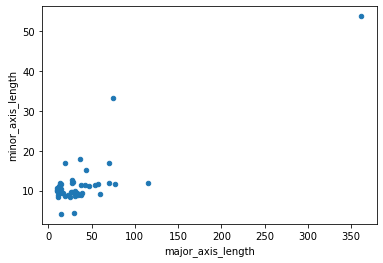

In [76]:
fracprops[1:].plot.scatter(x='major_axis_length', y='minor_axis_length')